In [1]:
import sys
sys.path.append('..')
from utils.evaluation_helper import ObjectDetectionEvaluator
from utils.conversion_helpers import convert_yolo_bboxes
from ultralytics import YOLO
import os

model = YOLO("../../runs/detect/train/weights/best.pt")
model.info()

YOLO11s summary: 319 layers, 9,428,179 parameters, 0 gradients, 21.5 GFLOPs


(319, 9428179, 0, 21.548492800000002)

In [2]:
def yolo_predict(model, img, **kwargs):
    # default arguments which overwrite the evaluation function:
    # https://docs.ultralytics.com/modes/predict/#inference-arguments
    confidence = kwargs.get("confidence", 0.001)
    results = model(img, conf=confidence, verbose=False)
    confidences = []
    boxes = []
    
    for result in results:
        for box in result.boxes:
            confidences.append(box.conf.item())
            boxes.append(box.xyxy[0].tolist())
    
    return confidences, boxes

In [3]:
image_dir = "../../data/merged/images/test"
annotation_dir = "../../data/merged/labels/test"

image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir)]
annotation_paths = [os.path.join(annotation_dir, f) for f in os.listdir(annotation_dir)]
assert len(image_paths) == len(annotation_paths)
all_bboxes = convert_yolo_bboxes(annotation_paths, image_paths)

In [4]:
evaluator = ObjectDetectionEvaluator(model, image_paths, all_bboxes, yolo_predict)
evaluator.get_metric_summary(verbose=False)

Processing images: 100%|██████████| 399/399 [00:10<00:00, 38.21it/s]


{'Box(Precision)': 0.8810483869191434,
 'Box(Recall)': 0.8323809522224037,
 'Confusion Matrix': {'TP': 437, 'FP': 59, 'FN': 88, 'TN': None},
 'mAP': [(50, 0.935361921787262),
  (55, 0.9397842288017273),
  (60, 0.945412278175354),
  (65, 0.948367714881897),
  (70, 0.9486003518104553),
  (75, 0.9407797455787659),
  (80, 0.8891838788986206),
  (85, 0.7945769429206848),
  (90, 0.5249404907226562),
  (95, 0.13398467004299164)],
 'mAP50': 0.935361921787262,
 'mAP50-95': np.float64(0.8000992223620415)}

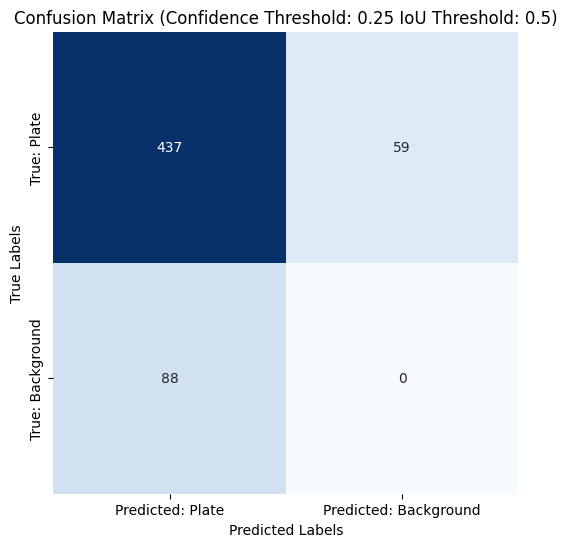

In [5]:
evaluator.visualize_confusion_matrix()

Precision calculation not possible at confidence ge: 0.8


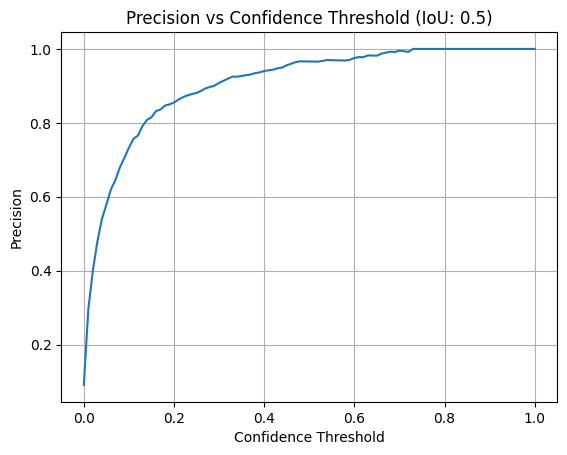

In [6]:
evaluator.visualize_precision_confidence_curve()

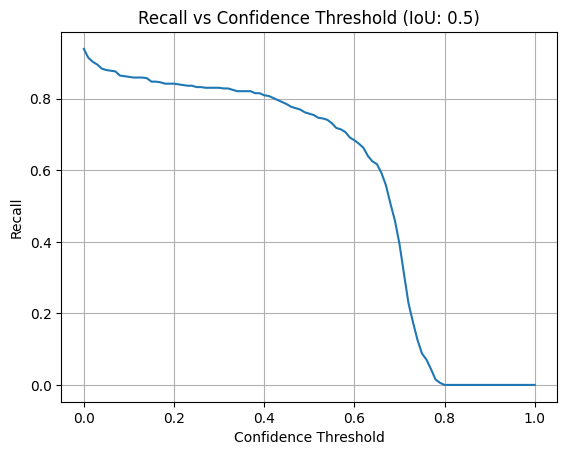

In [7]:
evaluator.visualize_recall_confidence_curve()

Precision calculation not possible at confidence ge: 0.8


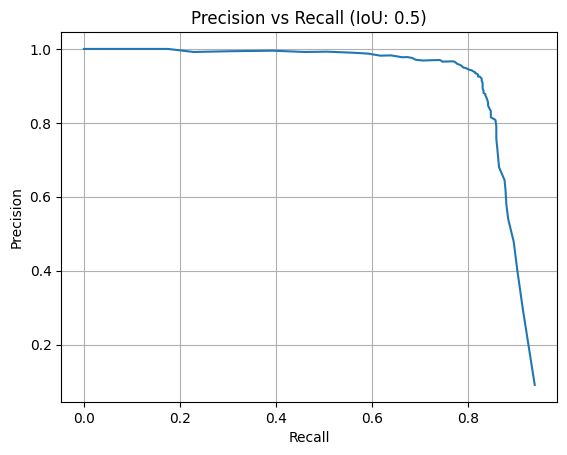

In [5]:
yolo_precision, yolo_recall = evaluator.visualize_precision_recall_curve()

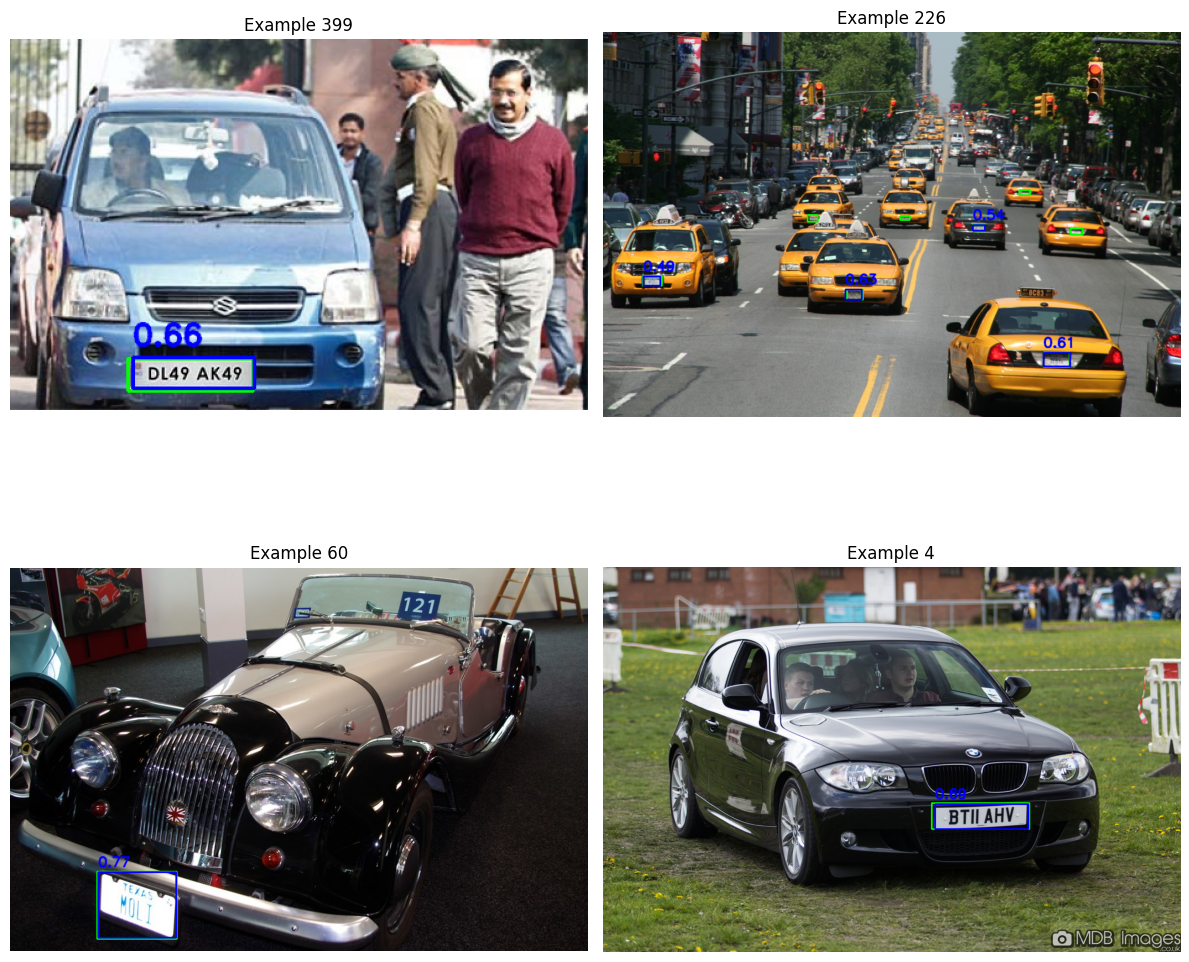

In [9]:
evaluator.visualize_for_examples()

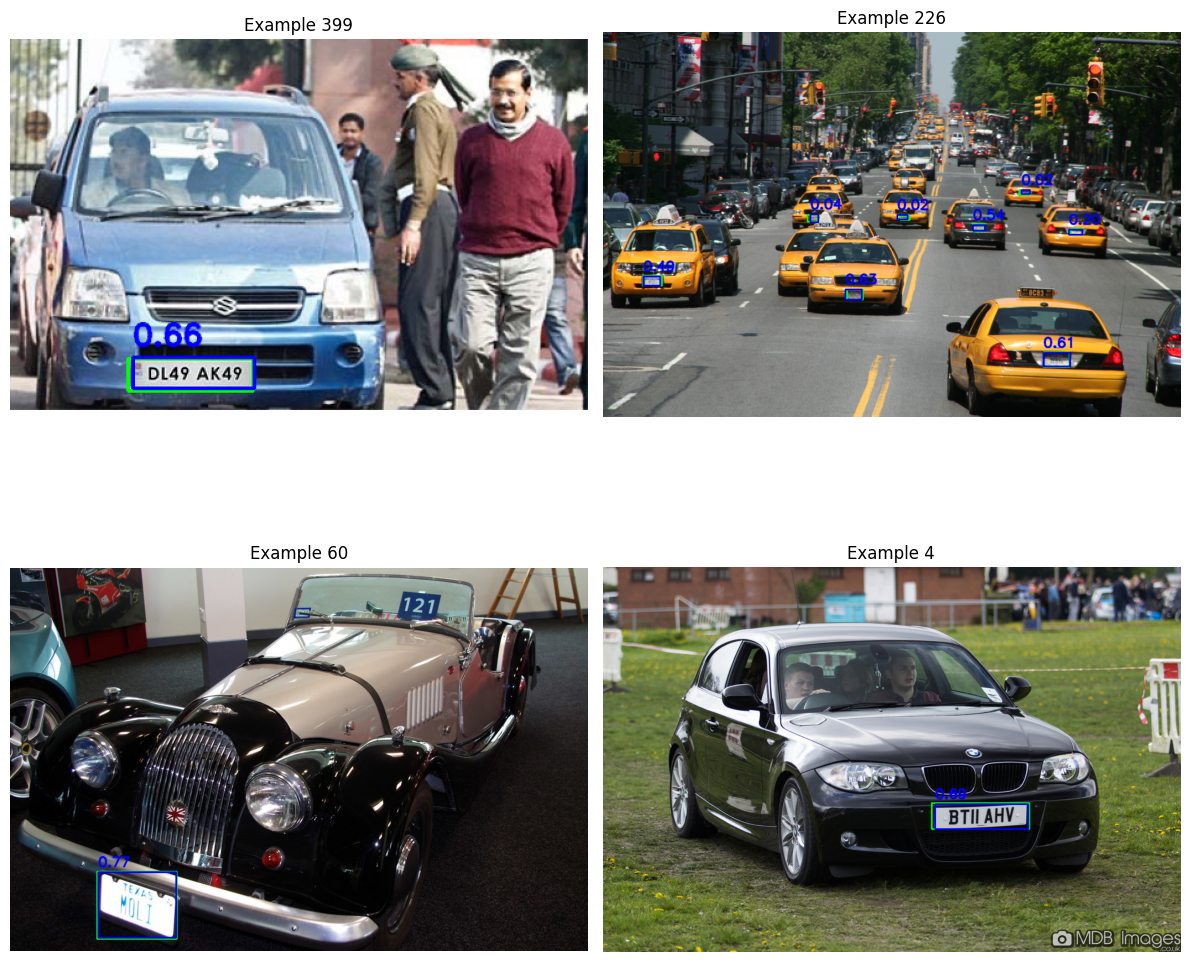

In [10]:
evaluator.visualize_for_examples(conf_threshold=0.01, iou_threshold=0.5)

In [5]:
from deep_sort_realtime.deepsort_tracker import DeepSort
deepsort = DeepSort(max_iou_distance=0.99, max_age=10)
evaluator.generate_evaluation_video(deepsort, "../../data/Traffic_Video.mp4", "../../data/Output_Yolo.mp4", 0.35)

Average Processing Time per Frame: 0.1263196873664856
Average Number of Different Plate Prediction per Tracking Target: 42.56140350877193
